In [1]:
# Go to root folder
%cd ../src
%rm -r __pycache__
%ls

/Users/macbook/meltPoolVideoProcess/meltPoolProcessingProject/src
__init__.py                oldImageProcessing.py
dataImageAndVideo.py       prosprectiveCorrection.py
dataProcessing.py          substractingImages.py
elipseDetection.py         videoProcessing.py
main.py*


In [2]:
import os
import glob
%matplotlib inline
import matplotlib.pyplot as plt

from videoProcessing import videoProcessing
from dataProcessing import dataProcessing

In [3]:
defAdress = '../video/'
folder_name = 'test_video/'
video_name = 'SS316L_DEDS2_104_d500_P1110_V25_42000fp_C001H001S0001_C001H001S0001' + '.mp4'

adressVideo = os.path.join(defAdress,folder_name,video_name)
print(adressVideo)

testViseo_peocessing = videoProcessing(adressVideo) 

../video/test_video/SS316L_DEDS2_104_d500_P1110_V25_42000fp_C001H001S0001_C001H001S0001.mp4
Process Start


# Step-by-step instruction 
- Run the following code with adjusted parameters
- Choose the right frame on which melt pool center can be clearly defined press ESC
- Make a left button click in the melt pool center press 
- Choose the filter type, where the boundary will be simmilar to ring and press ESC
- Check the data folder

### Data extraction

In [27]:
# Exctract initial pictures if required
testViseo_peocessing.extractInitialPictures(250)

252it [00:03, 68.65it/s]                         



Opened 251 frames
Process End

#### Work flow for regular processing and melt pool detection:
1. Start ellipse detection script;
2. Chose frame for melt pool centering, press esc;
3. Choose melt pool center, press esc;
4. Set-up filter press, esc

In [4]:
# Regular processing
# testViseo_peocessing.detectEllipse(numberOfFrames = 250,
#                                 nRays=200, 
#                                 putEllipseOnImage=True,
#                                 putPointsOnImage=False,
#                                 putBoxOnImage=False,
#                                 writeOutImages=True,
#                                 writeOutFilteredImages=False,
#                                 writeOutPropertiesUm=True,
#                                 writeOutParameters=True)

# Processin with previous parameters for filer
testViseo_peocessing.detectEllipseWithPrevFilterParam(numberOfFrames = 250,
                                nRays=100,
                                putEllipseOnImage=True,
                                putPointsOnImage=False,
                                putBoxOnImage=False,
                                writeOutImages=True,
                                writeOutFilteredImages=False,
                                writeOutPropertiesUm=True,
                                writeOutParameters=False,
                                writeOutAvgIntensity=True)

252it [00:03, 69.96it/s]                                                        



Opened 251 frames
Previous parameters in use
Process End

Text(0.5, 1.0, 'Transformed image')

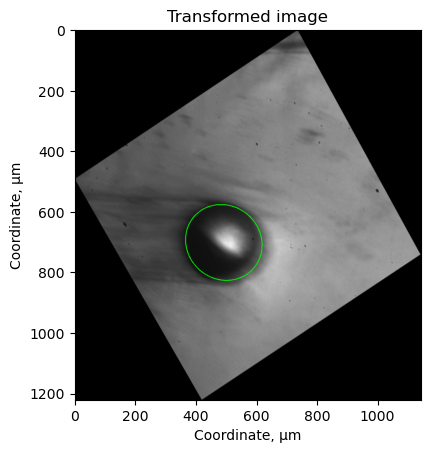

In [5]:
# Plots pictures with melt pool and countor 
imagesAdress = os.path.join('../data',video_name)
png_files = glob.glob(imagesAdress + '/*.png')
img = plt.imread(png_files[len(png_files)//2])

plt.figure()
plt.imshow(img)
plt.xlabel('Coordinate, µm')
plt.ylabel('Coordinate, µm')
plt.title('Transformed image')

### Data processing 

Avereage intensity and std [62.7605661879897, 5.798290399484178]


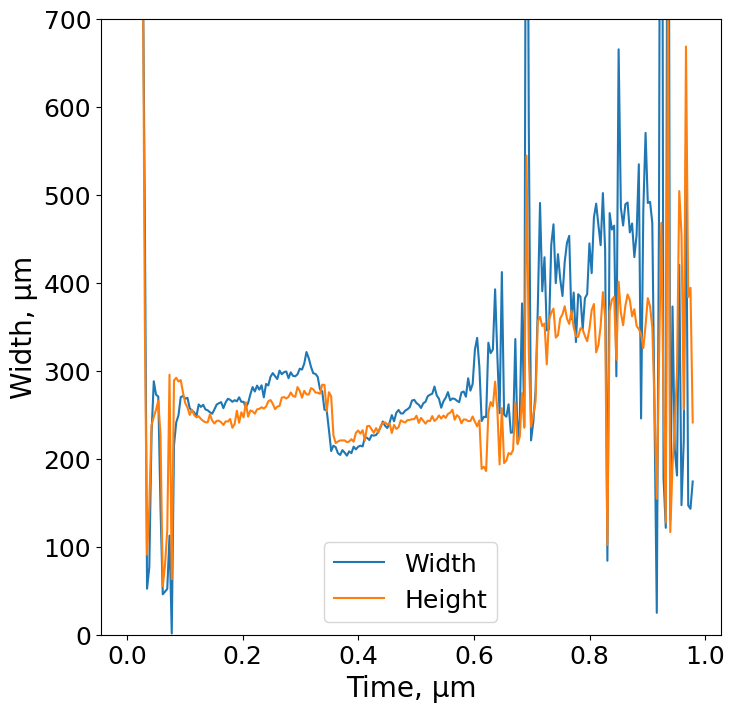

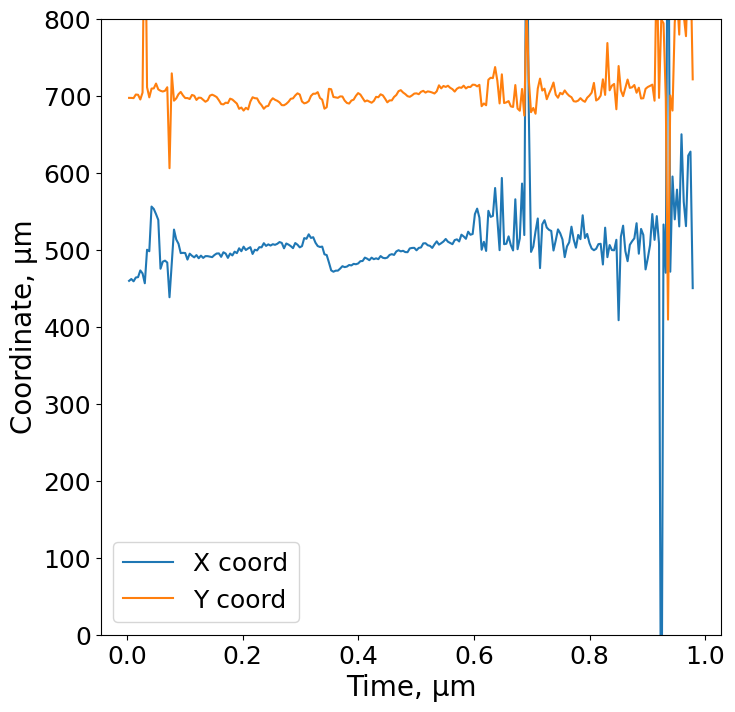

In [6]:
testDataVideoProcessing = dataProcessing(video_name)
testDataVideoProcessing.plotWidthHeightOverTime()
testDataVideoProcessing.plotMeltPoolCenterOverTime()
print('Avereage intensity and std', testDataVideoProcessing.calcAvgInetensity(t1=0.2,t2=0.6))